In [1]:
%run preprocessing_loader_v2.ipynb

ConnectionError: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/kartik2112/fraud-detection (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002BDA184DD90>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)"))

ConnectionError: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/kartik2112/fraud-detection (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002BDA184DD90>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)"))

ConnectionError: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/kartik2112/fraud-detection (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002BDA184DD90>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)"))

# Modules 

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (f1_score, precision_score, recall_score,roc_auc_score,average_precision_score,confusion_matrix,classification_report, accuracy_score)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna

# Gradient Boosting Classifier

In [4]:
gbc = GradientBoostingClassifier(
    n_estimators=5,       # nombre d’arbres
    learning_rate=0.1,      # taux d’apprentissage
    max_depth=3,            # profondeur max des arbres
    random_state=42
)


---

# Without SMOTE and without optimization

---

# Training

In [5]:
X_train = X_train_full
y_train = y_train_full

# Calculate scale_pos_weight
scale = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Class imbalance ratio : {scale:.1f}:1")
print(f"scale_pos_weight: {scale:.1f}")

Class imbalance ratio : 171.7:1
scale_pos_weight: 171.7


In [6]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=5, random_state=42)

# Predictions

In [7]:
X_test = X_val
y_test = y_val

In [8]:
y_pred = gbc.predict(X_test)

# Evaluate

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy du Gradient Boosting : {acc:.4f}\n")


print("📊 Report of classifier :")
y_pred_base_new = gbc.predict(X_test)
y_pred_proba_base_new = gbc.predict_proba(X_test)[:,1]

print(f"F1-Score:          {f1_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"Precision:         {precision_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"Recall:            {recall_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"ROC-AUC:           {roc_auc_score(y_test, y_pred_proba_base_new)*100:.4f} %")
print(f"PR-AUC:            {average_precision_score(y_test, y_pred_proba_base_new)*100:.4f} %")

✅ Accuracy du Gradient Boosting : 0.9942

📊 Report of classifier :
F1-Score:          17.8747 %
Precision:         49.1018 %
Recall:            10.9260 %
ROC-AUC:           92.1330 %
PR-AUC:            43.9700 %


# Confusion Matrix

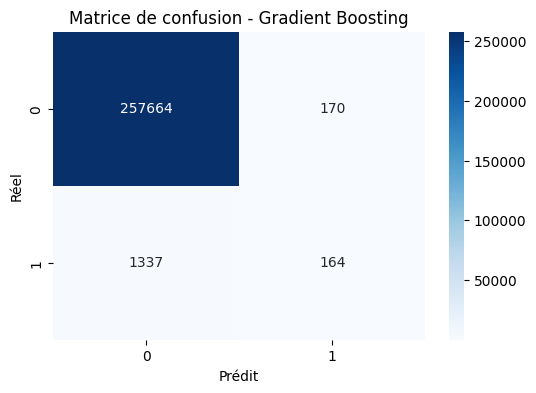

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Gradient Boosting")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

---

# Without SMOTE and with optimization

---

In [13]:
def objective(trial):
    # Espace de recherche des hyperparamètres
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 2, 5),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    }
    
    # Modèle
    model = GradientBoostingClassifier(**params, random_state=42)

    # Validation croisée pour évaluer la performance moyenne
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    return scores.mean()  # objectif : maximiser la précision moyenne


In [14]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Nombre d’essais :", len(study.trials))
print("Meilleur score :", study.best_value)
print("Meilleurs hyperparamètres :", study.best_params)

[I 2025-10-17 14:52:26,495] A new study created in memory with name: no-name-9059b1cd-a53f-4b89-a0d9-f20c3671200a


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-17 14:54:30,893] Trial 0 finished with value: 0.994211155455299 and parameters: {'n_estimators': 2, 'learning_rate': 0.009894520271087913, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 16, 'subsample': 0.6739458254707438}. Best is trial 0 with value: 0.994211155455299.
[W 2025-10-17 15:04:28,364] Trial 1 failed with parameters: {'n_estimators': 5, 'learning_rate': 0.024391647118620886, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 18, 'subsample': 0.7878931647345673} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\maxim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\maxim\AppData\Local\Temp\ipykernel_23192\672677158.py", line 16, in objective
    scores = cross_val_score(model, X

KeyboardInterrupt: 

In [ ]:
best_model = GradientBoostingClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\n✅ Rapport de classification :\n", classification_report(y_test, y_pred))
print("✅ Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("✅ Précision :", accuracy_score(y_test, y_pred))

---

# With SMOTE and without optimization

---

In [15]:
X_train_smote = X_train_resampled
y_train_smote = y_train_resampled

In [16]:
gbc.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(n_estimators=5, random_state=42)

# Predictions

In [ ]:
print(f"\n AFTER SMOTE:")
print(f"   Class 0 (legitimate): {(y_train_smote == 0).sum():,}")
print(f"   Class 1 (fraud):      {(y_train_smote == 1).sum():,}")
print(f"   Ratio: {(y_train_smote == 0).sum() / (y_train_smote == 1).sum():.1f}:1")

print(f"\n Size changes:")
print(f"   Before: {X_train_smote.shape[0]:,} samples")
print(f"   After:  {X_train_smote.shape[0]:,} samples")
print(f"   Added:  {X_train_smote.shape[0] - X_train_smote.shape[0]:,} synthetic frauds")

# Convert back to DataFrame (SMOTE returns numpy arrays)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote = pd.Series(y_train_smote, name='is_fraud')

✅ Accuracy du Gradient Boosting : 0.9942

📊 Report of classifier :
F1-Score:          53.3215 %
Precision:         48.0492 %
Recall:            59.8934 %
ROC-AUC:           95.0726 %
PR-AUC:            34.8768 %


---

# With SMOTE and with optimization

---

In [ ]:
def objective(trial):
    # Espace de recherche des hyperparamètres
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 2, 5),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    }
    
    # Modèle
    model = GradientBoostingClassifier(**params, random_state=42)

    # Validation croisée pour évaluer la performance moyenne
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

    return scores.mean()  # objectif : maximiser la précision moyenne


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Nombre d’essais :", len(study.trials))
print("Meilleur score :", study.best_value)
print("Meilleurs hyperparamètres :", study.best_params)

In [ ]:
best_model = GradientBoostingClassifier(**study.best_params, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test)

print("\n✅ Rapport de classification :\n", classification_report(y_test, y_pred))
print("✅ Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("✅ Précision :", accuracy_score(y_test, y_pred))